In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import csv

csv_path = 'gdrive/MyDrive/pantun.csv'
df = pd.read_csv(csv_path)

In [3]:
df.head()

,teks,tipe
0,Pakai baju ukurannya pas \n Baju biru pemberia...,Pantun Bijak
1,Orang bijak cinta bahasa \n Bahasa luas Bahasa...,Pantun Pendidikan
2,Kepada siapa datangnya wahyu \n Kepada Nabi wa...,Pantun Nasihat
3,Citah perang melawan citah \n Seekor pelatuk m...,Pantun Pendidikan
4,"Ada gadis perawan, \n paling cantik di kampung...",Pantun Agama


In [4]:
df = df.drop(columns='tipe')
df.head()

,teks
0,Pakai baju ukurannya pas \n Baju biru pemberia...
1,Orang bijak cinta bahasa \n Bahasa luas Bahasa...
2,Kepada siapa datangnya wahyu \n Kepada Nabi wa...
3,Citah perang melawan citah \n Seekor pelatuk m...
4,"Ada gadis perawan, \n paling cantik di kampung..."


In [5]:
def seperate_lines(df):
  df[['Satu','Dua','Tiga','Empat','Lima','enam','tujuh','lapan','lan','luh']] = df.teks.str.split("\\",expand=True,)
  new_df = df.drop(['teks','Lima','enam','tujuh','lapan','lan','luh'], axis=1)
  return new_df

def remove_row_with_null(df):
  null_satu = df.index[df['Satu'].isnull()].tolist()
  null_dua = df.index[df['Dua'].isnull()].tolist()
  null_tiga = df.index[df['Tiga'].isnull()].tolist()
  null_empat = df.index[df['Empat'].isnull()].tolist()

  df.drop(null_satu, inplace=True)
  df.drop(null_dua, inplace=True)
  df.drop(null_tiga, inplace=True)
  df.drop(null_empat, inplace=True)
  return df

def remove_enter(df):
  for index, row in df.iterrows():
    row['Dua'] = row['Dua'][2:]
    row['Tiga'] = row['Tiga'][2:]
    row['Empat'] = row['Empat'][2:]
  return df

In [6]:
# Seperate every line into different columns

new_df = seperate_lines(df)
new_df = remove_row_with_null(new_df)
new_df = remove_enter(new_df)

In [7]:
new_df.head()

,Satu,Dua,Tiga,Empat
0,Pakai baju ukurannya pas,Baju biru pemberian mertua,Jangan lupa belajar dengan ikhlas,Agar kelak mendapat ridho_Nya
1,Orang bijak cinta bahasa,Bahasa luas Bahasa masyarakat,Bahasa itu menunjukan Bangsa,Bangsa terhotmat punya martabat
2,Kepada siapa datangnya wahyu,Kepada Nabi wahyu turun,Dari mana datangnya ilmu,Dari belajar dengan tekun
3,Citah perang melawan citah,Seekor pelatuk mati di tengah,Jika kau tak mahu sekolah,Ayah bunda pasti gelisah
4,"Ada gadis perawan,",paling cantik di kampungnya.,"Hormatilah ibumu kawan,",Ada surga di telapak kakinya.


In [8]:
# Make a series of every word used in pantun

kata = []
for row in new_df['Satu']:
  ls = row.split(" ")
  for i in ls:
    kata.append(i)
for row in new_df['Dua']:
  ls = row.split(" ")
  for i in ls:
    kata.append(i)
for row in new_df['Tiga']:
  ls = row.split(" ")
  for i in ls:
    kata.append(i)
for row in new_df['Empat']:
  ls = row.split(" ")
  for i in ls:
    kata.append(i)

kata_series = pd.Series(kata)

kata_series = kata_series.str.replace(r'[^\w\s]+', '', -1)
kata_series = kata_series.str.replace(' ', '', -1)
kata_series = kata_series.str.lower()
kata_series = kata_series.drop_duplicates()
kata_series.replace('', np.nan, inplace=True)
kata_series.dropna(inplace=True)
kata_series = kata_series.reset_index(drop=True)

kata_series.describe()

count      2722
unique     2722
top       kapal
freq          1
dtype: object

In [9]:
# Make series for every akhiran in words

labels = []
vowel = ['a', 'i', 'u', 'e', 'o']
counter = 0

for kata in kata_series:
  
  temp = []
  if not set('aeiou').intersection(kata):
    labels.append("AAAAAA")
  else:
    for i in reversed(kata):
      
      temp.append(i)
      if i in vowel:
        counter += 1
        labels.append(''.join(temp)[::-1])
        break

print("Length of the series: {}".format(len(labels)))
print("Words with akhiran: {}\n".format(counter))

label_series = pd.Series(labels)
label_series.describe()

Length of the series: 2722
Words with akhiran: 2709



count     2722
unique      73
top          a
freq       532
dtype: object

In [87]:
# Test the series

print("the word: {}".format(kata_series[2706]))
print("akhiran: {}".format(labels[2706]))

the word: cukup
akhiran: up


In [111]:
# Make the DF

frame = {'kata': kata_series,
         'akhiran': label_series}
  
df_rhyme = pd.DataFrame(frame)
df_rhyme.describe()

,kata,akhiran
count,2722,2722
unique,2722,73
top,kapal,a
freq,1,532


In [112]:
# find words with null akhiran

df_rhyme[df_rhyme['akhiran'] == "AAAAAA"]

,kata,akhiran
289,d,AAAAAA
628,2,AAAAAA
1070,lh,AAAAAA
1189,k,AAAAAA
1557,11,AAAAAA
1803,mw,AAAAAA
1856,mcm,AAAAAA
1860,nk,AAAAAA
1996,72,AAAAAA
2210,1781945,AAAAAA


<img src="https://i.kym-cdn.com/entries/icons/facebook/000/034/772/Untitled-1.jpg" width="400">

In [113]:
df_rhyme.replace('AAAAAA', np.nan, inplace=True)
df_rhyme.dropna(inplace=True)

df_rhyme['akhiran'].isnull().value_counts()

False    2709
Name: akhiran, dtype: int64

In [114]:
df_rhyme.akhiran.unique()

array(['i', 'u', 'a', 'as', 'ang', 'ak', 'ah', 'an', 'is', 'in', 'ap',
       'at', 'am', 'it', 'up', 'or', 'uh', 'ab', 'e', 'ul', 'ung', 'ik',
       'ir', 'ut', 'il', 'un', 'ar', 'us', 'on', 'im', 'em', 'um', 'ih',
       'ok', 'ing', 'er', 'ur', 'o', 'ity', 'uk', 'eng', 'al', 'ip', 'et',
       'od', 'es', 'ib', 'ek', 'ong', 'ipt', 'ath', 'if', 'ep', 'el',
       'eh', 'ud', 'alm', 'oh', 'ol', 'en', 'af', 'ey', 'uz', 'os', 'id',
       'elm', 'aq', 'ess', 'iz', 'ow', 'alh', 'op'], dtype=object)

In [119]:
# Handle akhiran yang aneh : alm, ity, uz, elm, aq, ess, iz, ow, alh, ath, od, ipt, id

df_rhyme['akhiran'].replace('alm', 'em', inplace=True)
df_rhyme['akhiran'].replace('ity', 'i', inplace=True)
df_rhyme['akhiran'].replace('uz', 'us', inplace=True)
df_rhyme['akhiran'].replace('elm', 'em', inplace=True)
df_rhyme['akhiran'].replace('aq', 'u', inplace=True)
df_rhyme['akhiran'].replace('ess', 'es', inplace=True)
df_rhyme['akhiran'].replace('iz', 'is', inplace=True)
df_rhyme['akhiran'].replace('id', 'it', inplace=True)
df_rhyme['akhiran'].replace('ath', 'at', inplace=True)
df_rhyme['akhiran'].replace('od', 'ut', inplace=True)

# akhiran ipt
df_rhyme.drop(671, inplace=True)
# akhiran alh
df_rhyme.drop(2552, inplace=True)

df_rhyme.akhiran.unique()

array(['i', 'u', 'a', 'as', 'ang', 'ak', 'ah', 'an', 'is', 'in', 'ap',
       'at', 'am', 'it', 'up', 'or', 'uh', 'ab', 'e', 'ul', 'ung', 'ik',
       'ir', 'ut', 'il', 'un', 'ar', 'us', 'on', 'im', 'em', 'um', 'ih',
       'ok', 'ing', 'er', 'ur', 'o', 'uk', 'eng', 'al', 'ip', 'et', 'es',
       'ib', 'ek', 'ong', 'if', 'ep', 'el', 'eh', 'ud', 'oh', 'ol', 'en',
       'af', 'ey', 'os', 'ow', 'op'], dtype=object)

In [120]:
df_rhyme[df_rhyme['akhiran'] == 'id']

,kata,akhiran


In [124]:
# Ada akhiran yang cuma 1

df2 = pd.DataFrame([['mei', 'ey'],
                    ['may', 'ey'],
                    ['hei', 'ey'],
                    ['wakaf', 'af'],
                    ['draf', 'af'],
                    ['khilaf', 'af'],
                    ['sop', 'op'],
                    ['stetoskop', 'op'],
                    ['bioskop', 'op'],
                    ['ancol', 'ol'],
                    ['bentol', 'ol'],
                    ['benjol', 'ol'],
                    ['cebol', 'ol']], columns=['kata', 'akhiran'])

added_df = df_rhyme.append(df2, ignore_index=True)

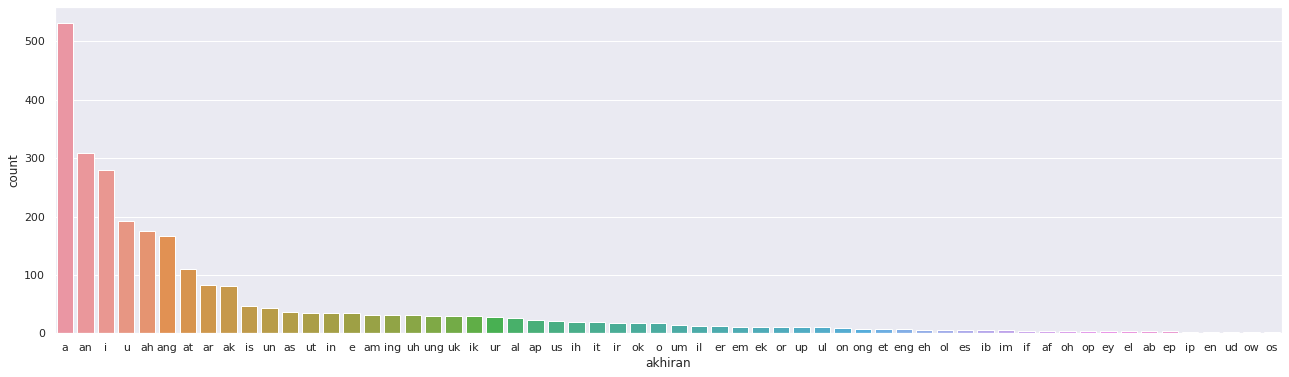

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
plt.figure(figsize=(22, 6))
ax = sns.countplot(x="akhiran", data=added_df, order = added_df['akhiran'].value_counts().index)

IMBALANCE LOL



---



In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    added_df['kata'],
    added_df['akhiran'],
    test_size=0.1,
    random_state=45,
    stratify=added_df['akhiran'])

print("X_train: {}".format(X_train.count()))
print("X_test: {}\n".format(X_test.count()))
print("y_train: {}".format(y_train.count()))
print("y_test: {}".format(y_test.count()))

X_train: 2448
X_test: 272

y_train: 2448
y_test: 272


In [129]:
# import tensorflow as tf

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(61, activation='softmax')
# ])

# model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# num_epochs = 100
# batch_size = 128
# history = model.fit(df['kata'],
#                     df['akhiran'],
#                     batch_size=batch_size,
#                     epochs=num_epochs,
#                     validation_split=0.1)
print("// TODO : BUAT MODEL")

// TODO : BUAT MODEL
